# Plot NEON ancillary data stack
Paul Montesano, PhD

In [3]:
import numpy as np
import h5py
import osgeo
from osgeo import gdal, osr
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import glob
from glob import glob
# import sys, os
# sys.path.append('/home/pmontesa/code/icesat2_boreal/lib')
import rasterio as rio 
from rasterio.crs import CRS
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from pathlib import Path

from rasterio.transform import from_origin
from rasterio.profiles import DefaultGTiffProfile

import sys
sys.path.append('/home/pmontesa/code/pygeotools')
from pygeotools.lib import iolib, malib, geolib, filtlib, warplib

In [4]:
NEON_SITE_YEARS_LIST_DICTIONARY = {'MLBS': ['2015','2017','2018','2021','2022'], 
                                   'SERC': ['2016','2017','2019','2021','2022']
                                  }

In [5]:
sys.path.append('/home/pmontesa/code/geoscitools')
import NEONlib
NEONlib.list_imagery

['Aerosol_Optical_Depth',
 'Aspect',
 'Cast_Shadow',
 'Dark_Dense_Vegetation_Classification',
 'Data_Selection_Index',
 'Haze_Cloud_Water_Map',
 'Illumination_Factor',
 'Path_Length',
 'Sky_View_Factor',
 'Slope',
 'Smooth_Surface_Elevation',
 'Visibility_Index_Map',
 'Water_Vapor_Column',
 'Weather_Quality_Indicator',
 'Weather_Quality_Indicator_2',
 'Weather_Quality_Indicator_3',
 'Ang_diff_hotspot']

## Read and plot reflectance ancillary data for a subtile

In [4]:
large_stack_list = [iolib.fn_getma('/explore/nobackup/projects/ilab/data/AGB/output/MLBS/subtiles/2021/MLBS_2021_537000_4131000_538000_4132000/2021_NEON_D07_MLBS_DP3_537000_4131000_reflectance_ancillary.tif', bnum=b ) for b in range(1, len(NEONlib.list_imagery)+1)]

In [5]:
len(large_stack_list)

17

In [6]:
large_stack = np.stack( large_stack_list, axis=0 )
large_stack[large_stack==-9999]=np.nan
large_stack.shape

(17, 1000, 1000)

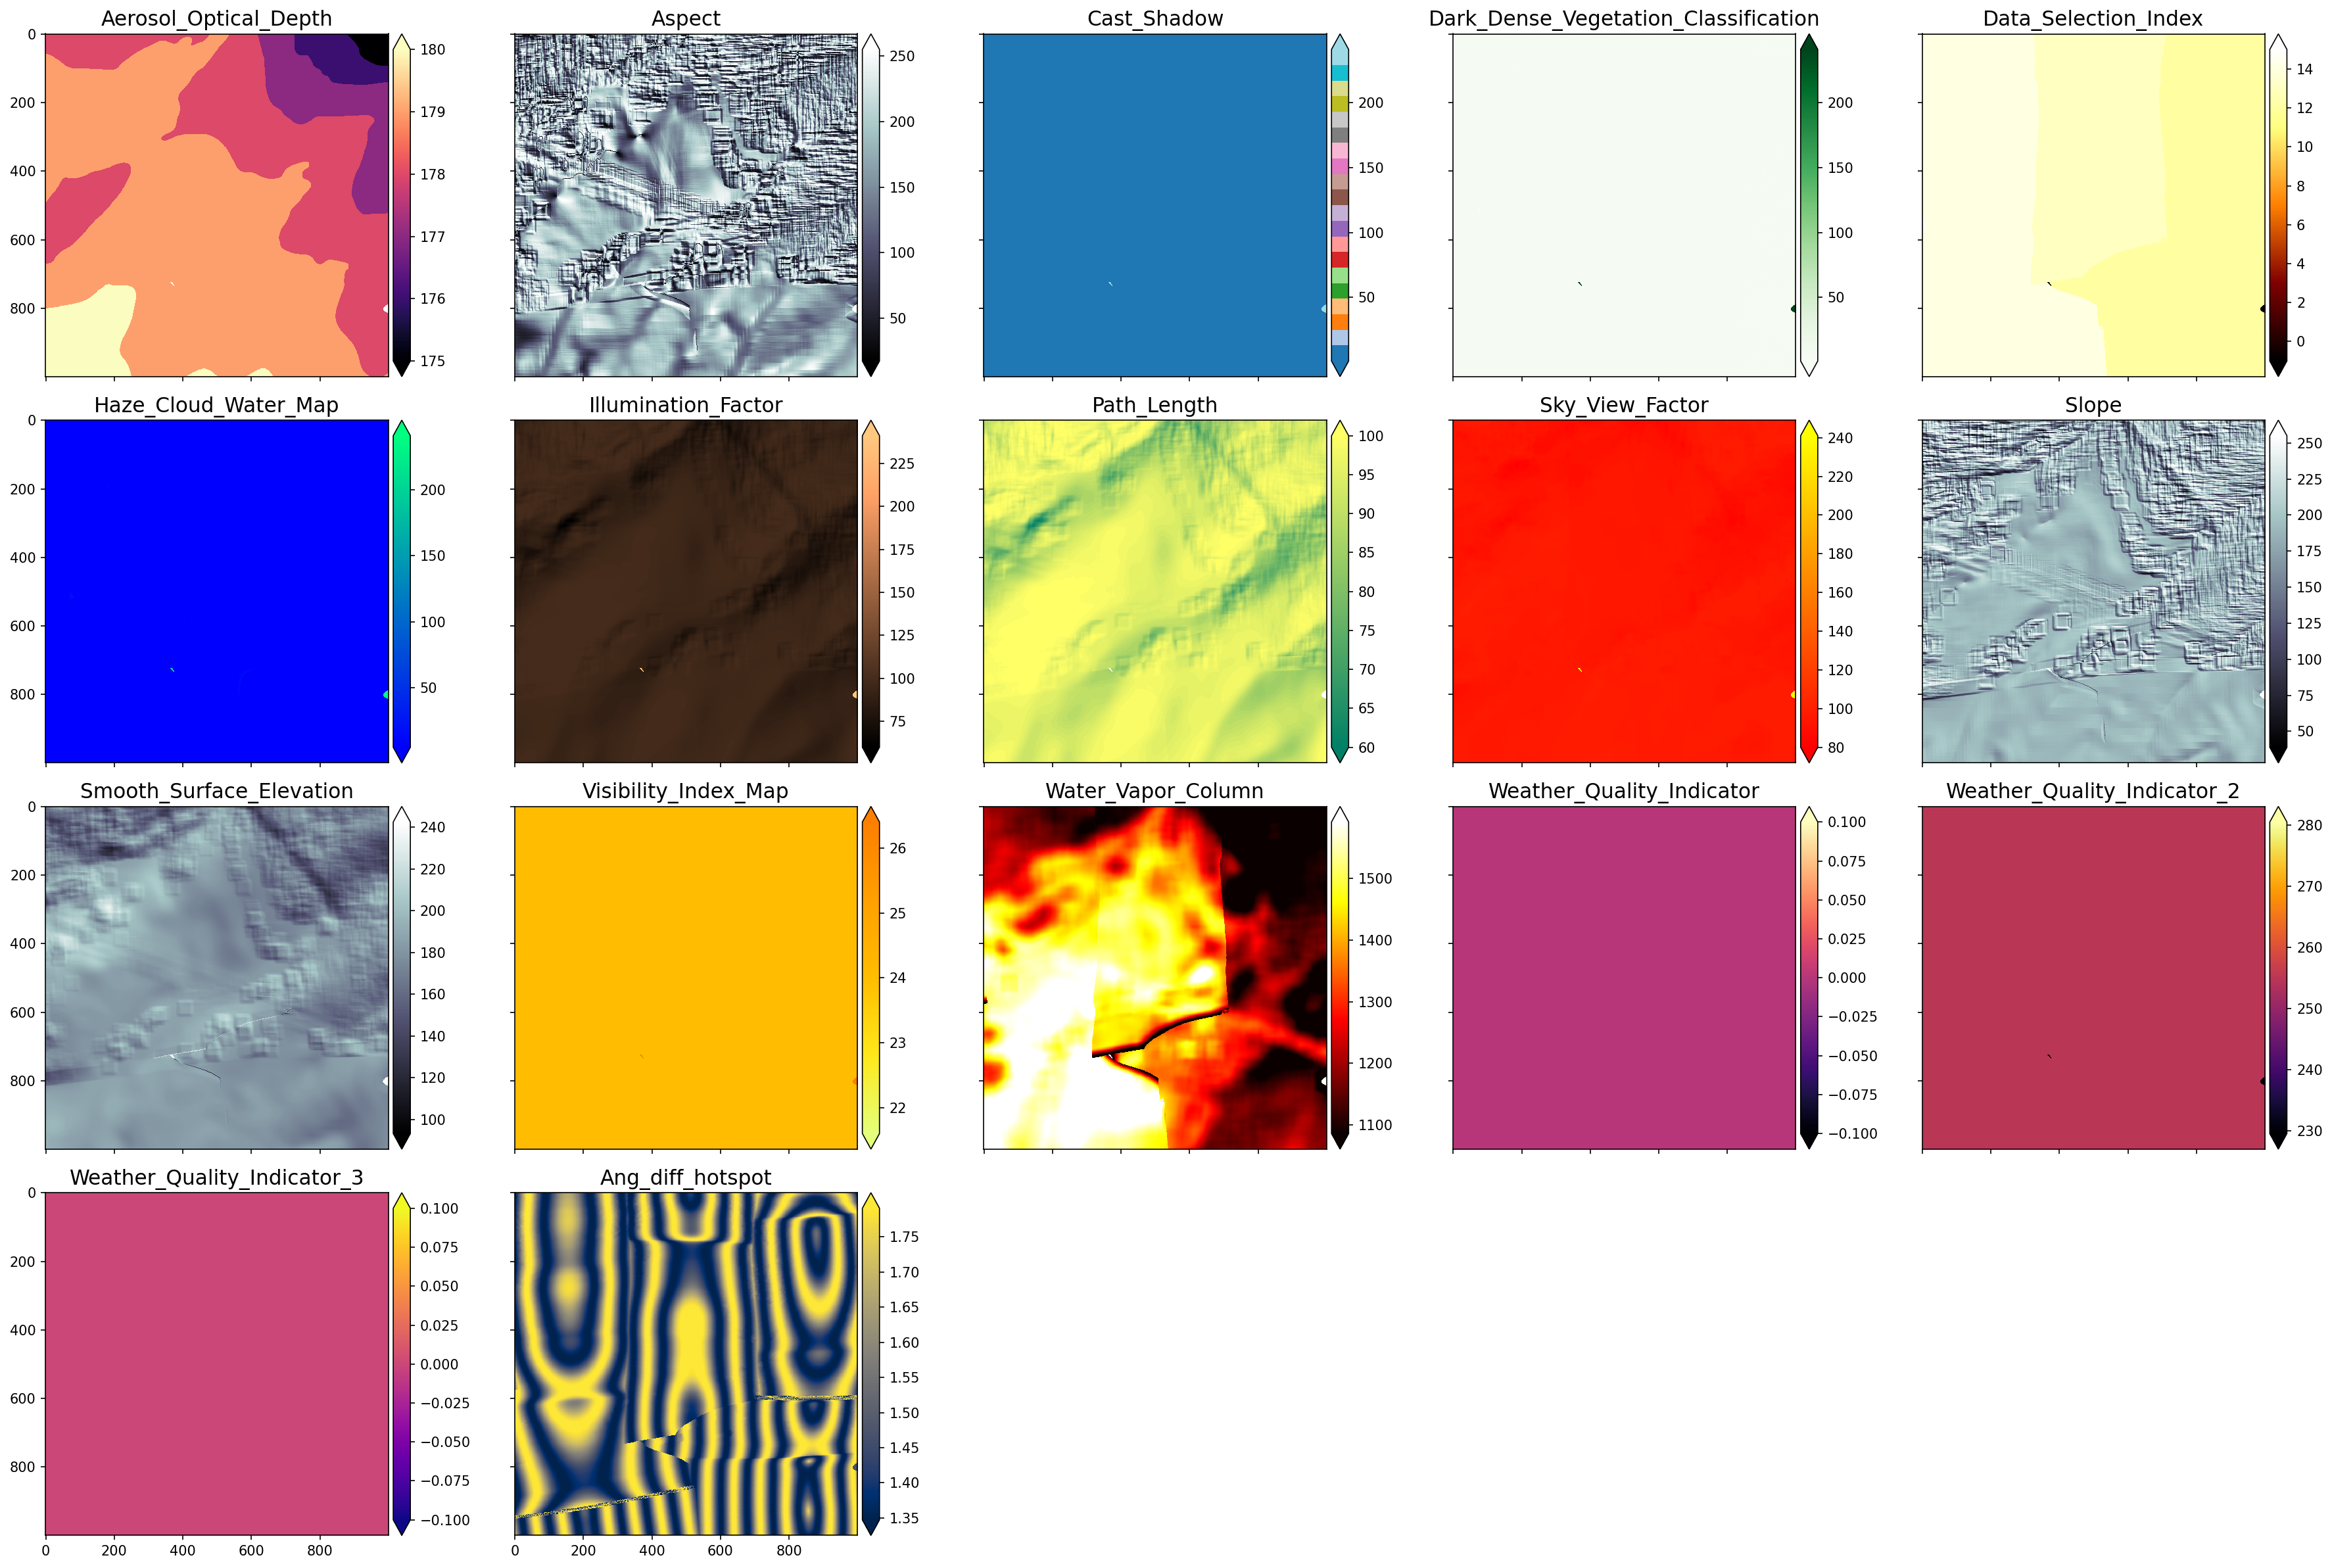

In [7]:
NEONlib.plot_ancillary_stack( large_stack, NEONlib.list_imagery)

## Read and plot reflectance ancillary data for the entire NEON site MLBS 

In [6]:
large_stack_list = [iolib.fn_getma('/explore/nobackup/projects/ilab/data/AGB/output/MLBS/vrt/MLBS_2015_Reflectance_reflectance_ancillary.vrt', bnum=b ) for b in range(1, len(NEONlib.list_imagery)-1+1)]

In [7]:
subset_stack = np.stack( large_stack_list, axis=0 )[:,:,0:5000]
large_stack_list = None
subset_stack[subset_stack==-9999]=np.nan
subset_stack.shape

(16, 13000, 5000)

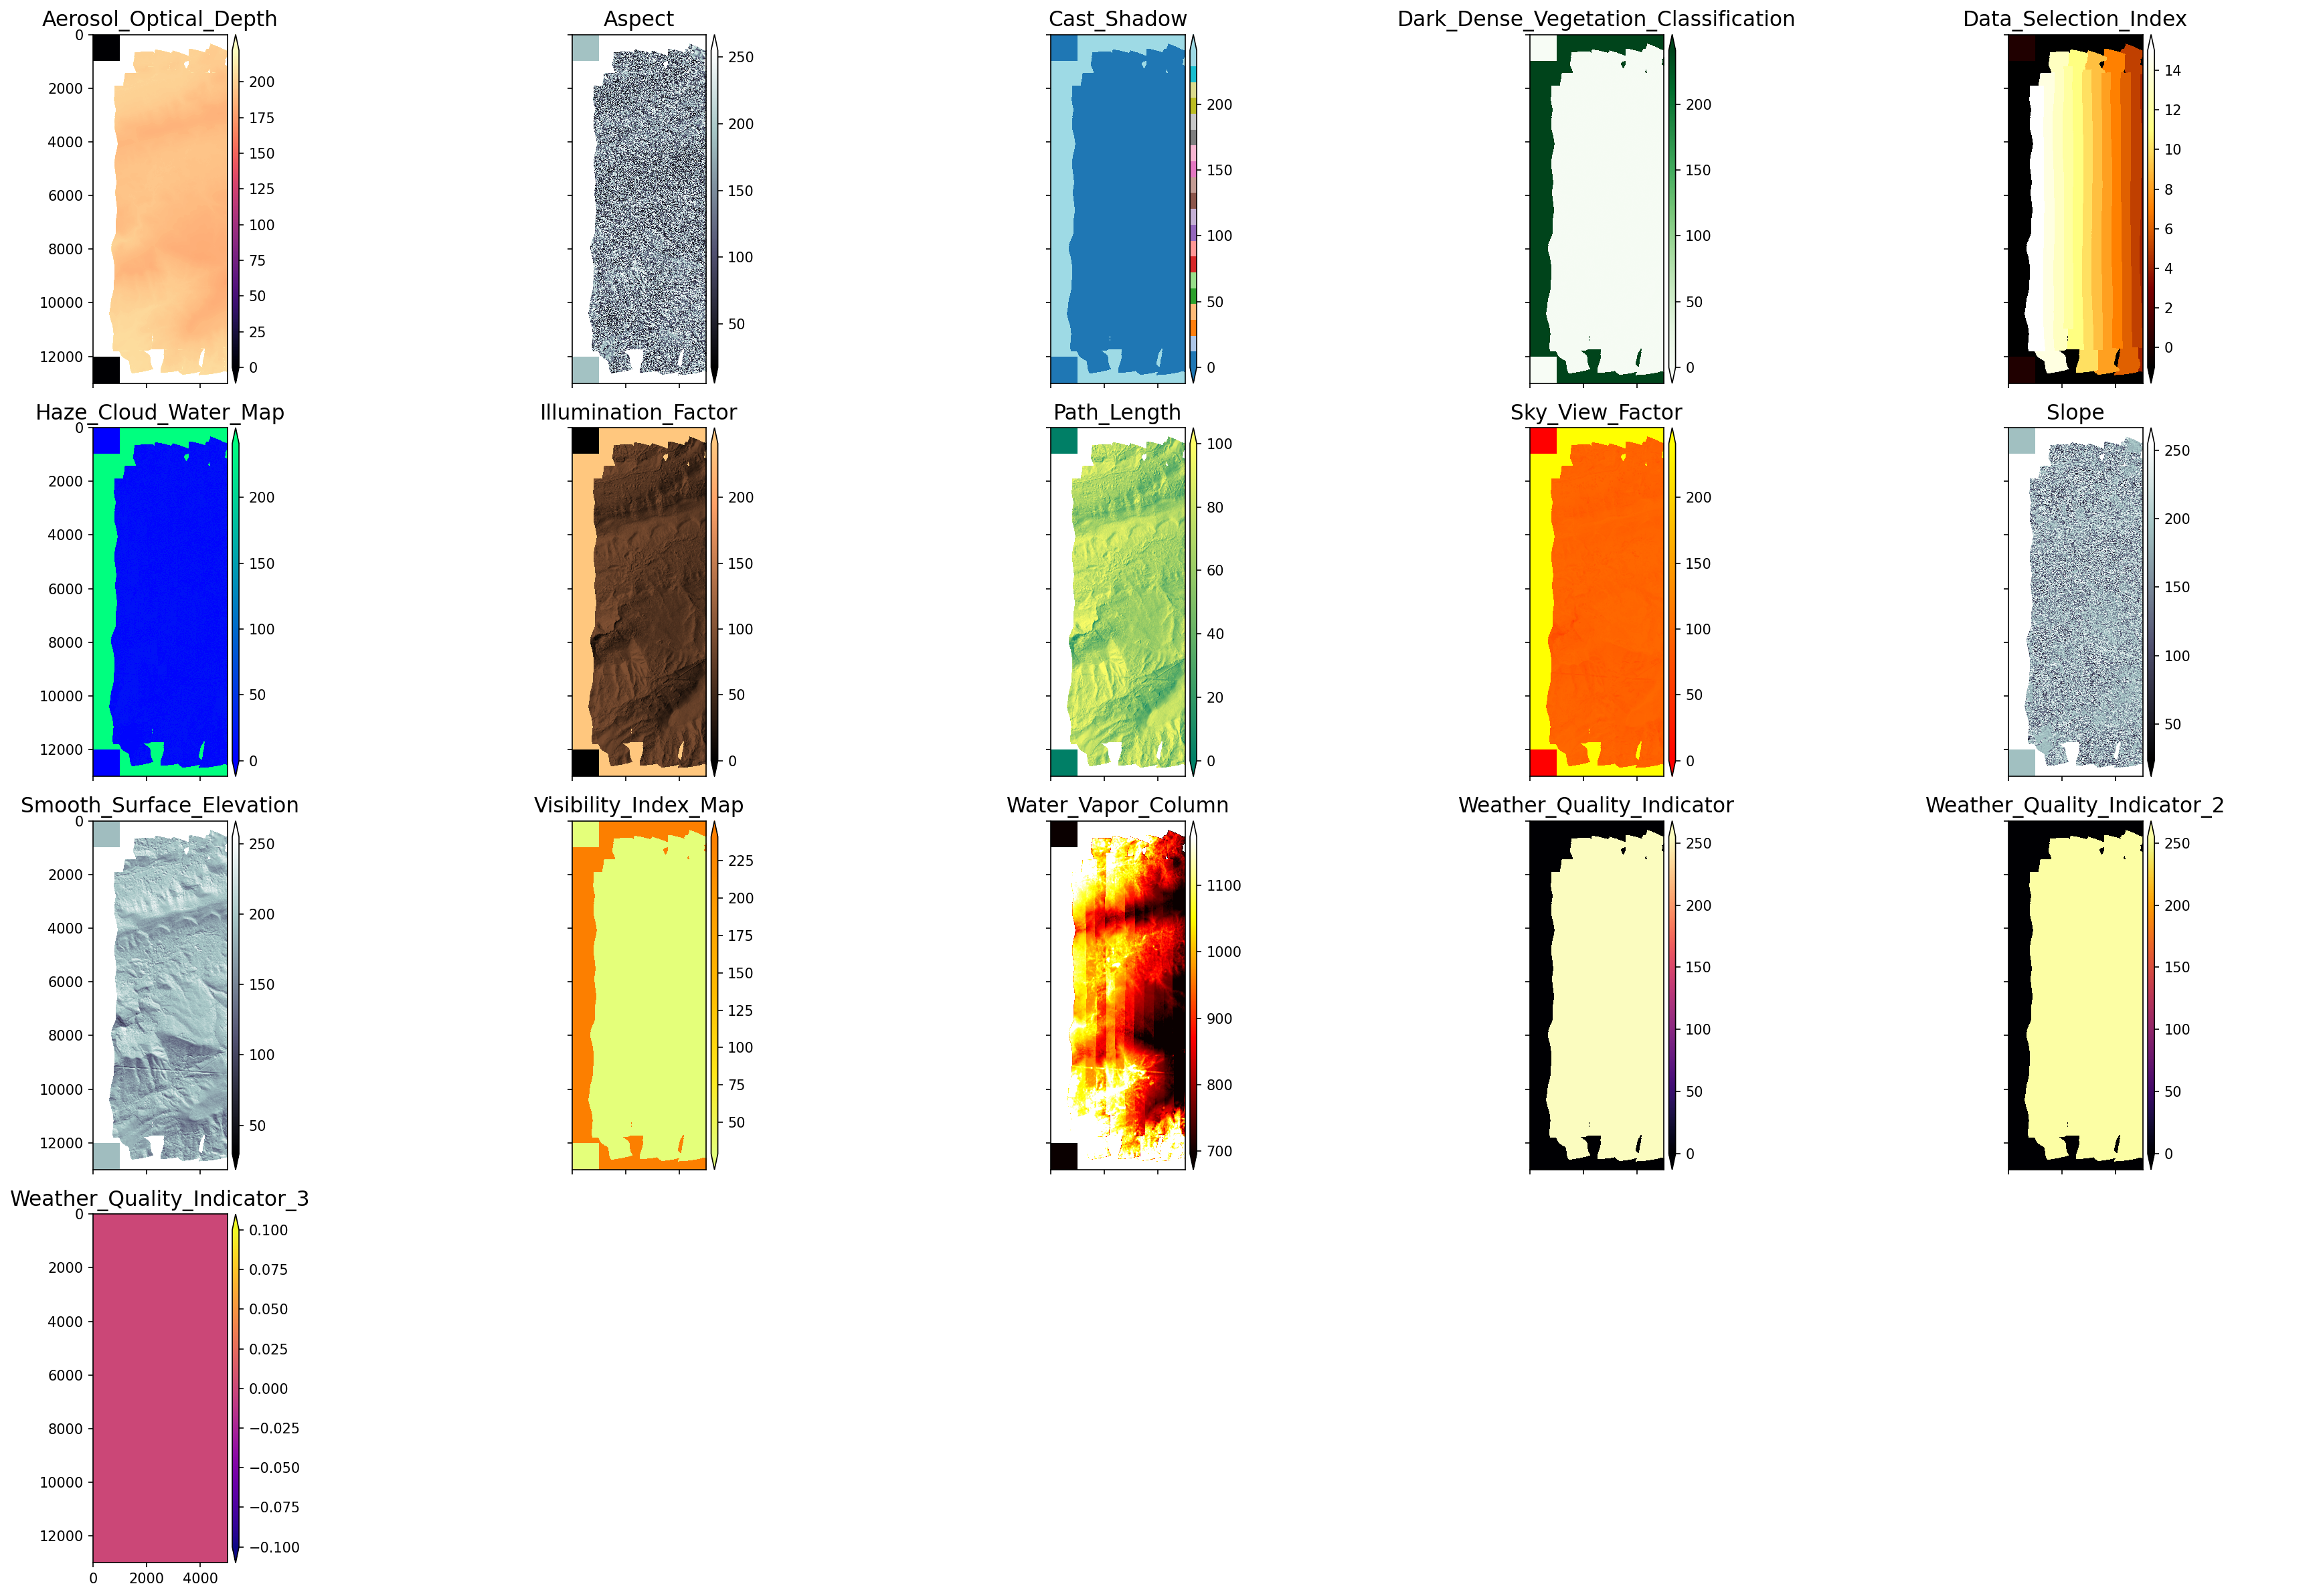

In [8]:
NEONlib.plot_ancillary_stack( subset_stack, NEONlib.list_imagery[0:-1]) # The VRTs dont have the last band

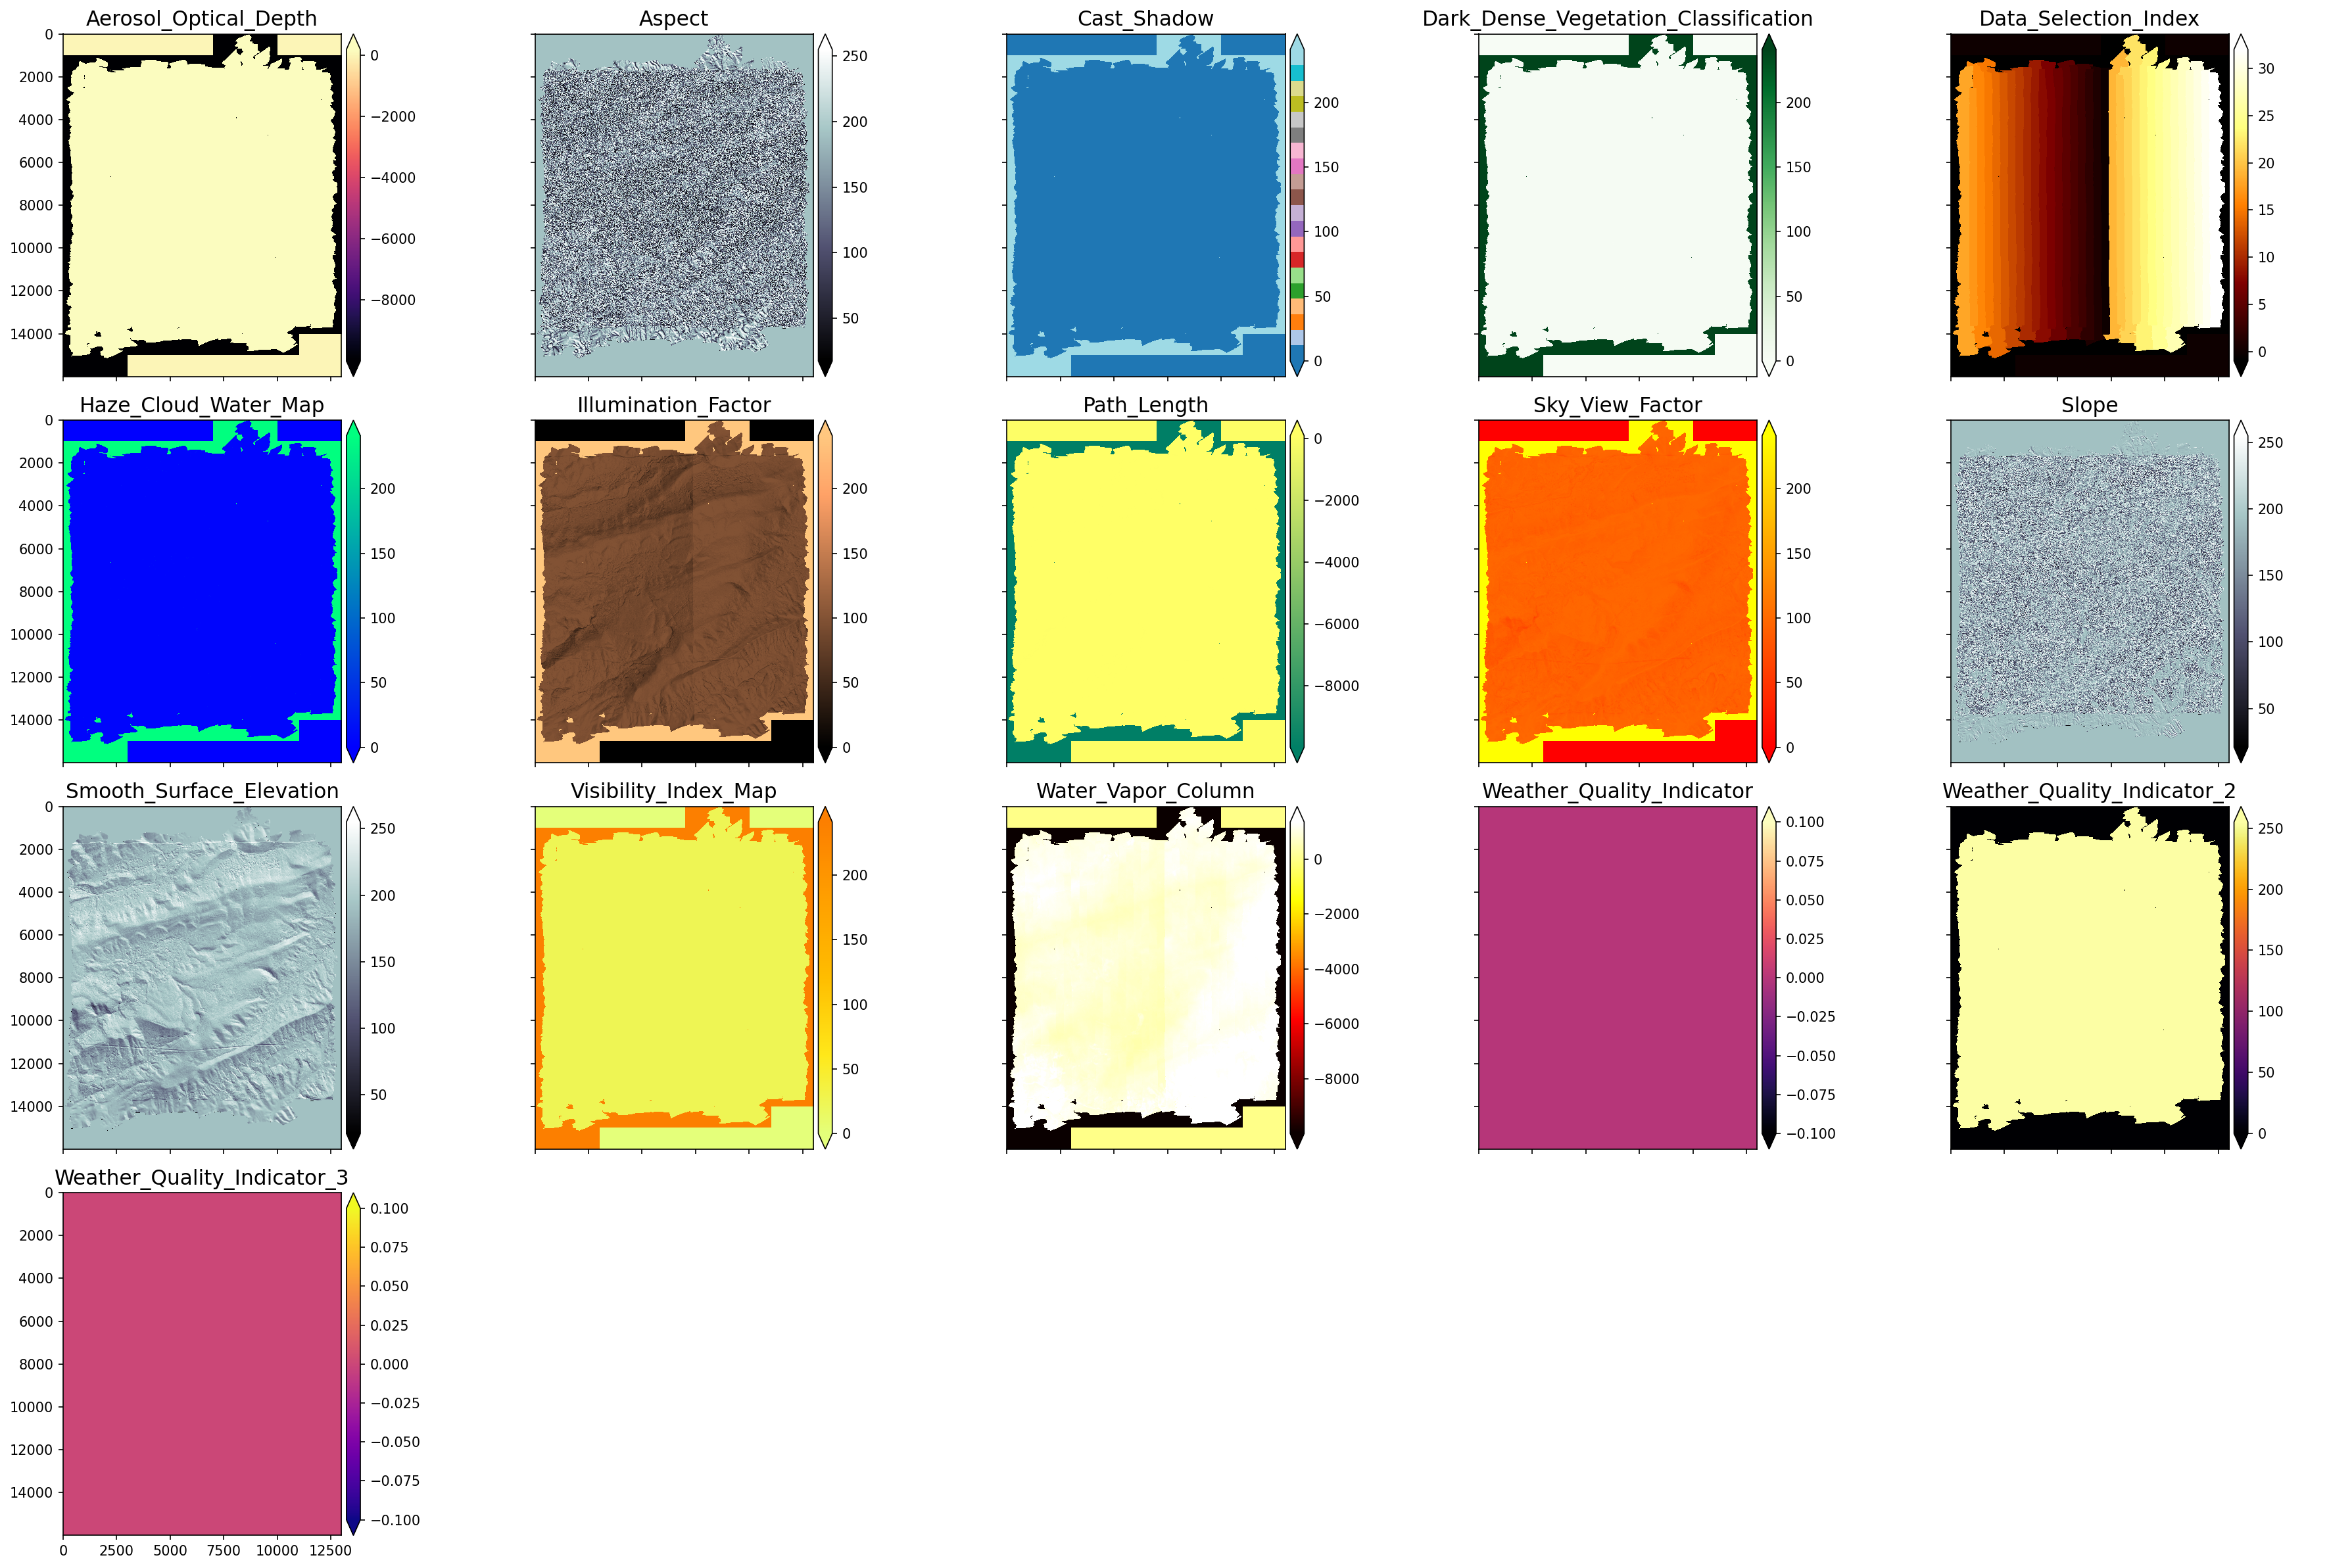

In [220]:
plot_ancillary_stack( large_stack, bandnames_list)